In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("/Users/meenakshirana/Desktop/new take off folder/data science study udemy/S38_L259 (1)/Categorical.csv")
data['continent'].unique()

array(['North America', 'Asia', 'Africa', 'Europe', 'South America',
       'Oceania', 'Antarctica', 'Seven seas (open ocean)'], dtype=object)

In [3]:
data_mapped = data.copy()
data_mapped['continent'] = data_mapped['continent'].map({'North America':0,'Asia':1,'Africa':2,'Europe':3,'Oceania':4,
                                                        'South America':5,'Antarctica':6,'Seven seas (open ocean)':7})

x = data_mapped.iloc[:,3:]


In [4]:
kmeans = KMeans(8)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([4, 1, 5, 4, 0, 0, 0, 1, 6, 1, 3, 7, 3, 2, 4, 3, 0, 1, 5, 0, 5, 5,
       1, 0, 1, 4, 4, 0, 4, 0, 4, 4, 6, 6, 4, 1, 1, 5, 5, 0, 6, 1, 5, 5,
       5, 5, 3, 6, 5, 5, 4, 4, 4, 4, 1, 1, 0, 0, 5, 4, 0, 4, 5, 6, 5, 5,
       0, 0, 5, 0, 3, 6, 0, 0, 3, 5, 0, 1, 0, 5, 5, 5, 5, 5, 0, 4, 4, 4,
       3, 6, 1, 2, 4, 0, 4, 0, 1, 0, 1, 1, 2, 0, 1, 1, 0, 1, 0, 4, 0, 1,
       1, 1, 1, 5, 1, 1, 3, 4, 1, 0, 1, 1, 1, 5, 5, 4, 0, 1, 5, 0, 0, 0,
       1, 4, 5, 0, 0, 5, 2, 4, 3, 0, 5, 0, 1, 0, 1, 3, 5, 5, 4, 2, 5, 1,
       5, 3, 5, 3, 5, 4, 3, 0, 0, 1, 3, 3, 1, 1, 4, 3, 6, 1, 3, 3, 0, 4,
       1, 0, 6, 1, 3, 1, 0, 0, 5, 5, 1, 5, 5, 5, 1, 2, 2, 3, 5, 4, 0, 5,
       5, 4, 0, 5, 6, 0, 0, 0, 5, 4, 2, 1, 4, 5, 5, 1, 1, 1, 1, 3, 4, 5,
       1, 1, 5, 5, 0, 6, 4, 1, 0, 4, 6, 4, 4, 1, 3, 3, 3, 1, 5, 5, 5],
      dtype=int32)

In [6]:
data_with_cluster = data.copy()
data_with_cluster['Cluster'] = identified_clusters

In [7]:
data_with_cluster

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,North America,4
1,Afghanistan,66.004734,33.835231,Asia,1
2,Angola,17.537368,-12.293361,Africa,5
3,Anguilla,-63.064989,18.223959,North America,4
4,Albania,20.049834,41.142450,Europe,0
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania,3
237,Yemen,47.586762,15.909280,Asia,1
238,South Africa,25.083901,-29.000341,Africa,5
239,Zambia,27.774759,-13.458242,Africa,5


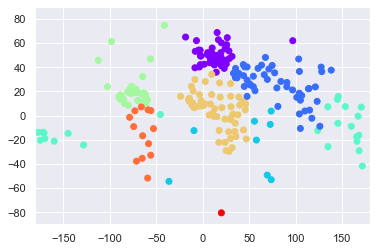

In [8]:
plt.scatter(data_with_cluster['Longitude'],data_with_cluster['Latitude'],c = data_with_cluster['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [10]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
kmeans.inertia_

6.229535960917178e-29

In [16]:
wcss = []

for i in range(1,8):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
wcss   

[672.7800829875519,
 227.974066091954,
 104.02818920210224,
 57.414727914727926,
 31.453189453189456,
 9.32132132132132,
 0.888888888888889]

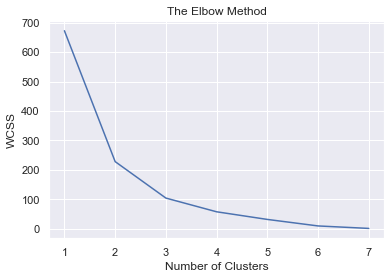

In [17]:
cluster_number = range(1,8)
plt.plot(cluster_number,wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()